In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unicorn-companies/Data_Dictionary.csv
/kaggle/input/unicorn-companies/Unicorn_Companies.csv


## Introduction

In this activity, we will discover characteristics of a dataset and use visualizations to analyze the data. This is a task in **exploratory data analysis (EDA)**.

EDA helps us to better understand the data at hand and determine how it can be used to solve the problem we want to address.

In this activity, we play members of an analytics team roles that provides insights to an investing firm. To help them decide which companies to invest in next, the firm wants insights into **unicorn companies**–companies that are valued at over one billion dollars. 

The data we use for this task provides information on over 1,000 unicorn companies, including their industry, country, year founded, and select investors. We will use this information to gain simple insights into how and when companies reach this prestigious milestone and to make recommentations for next steps to the investing firm.

[The dataset from Kaggle](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies)

In [4]:
# Load data from the csv file into a DataFrame and save in a variable
df = pd.read_csv('/kaggle/input/unicorn-companies/Unicorn_Companies.csv')
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


## Data exploration


In [5]:
df.head(10)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


We notice some initiative info from Date Joined - represents when the company became a Unicorn (reaching one billion dollars in valuation). And the "Select Investors" column represents the top investors in the company.

In [9]:
print(df.size)
print(df.shape)

10740
(1074, 10)


- size ~ 10740: This means that there are 10740 values in total across the whole dataset.
- shape ~ (1074, 10): There are 1074 rows (also known as entries), and 10 columns (or features). According to this dataset, there are 1074 unicorn companies as of March 2022, and this dataset also shows 10 aspects of each company.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


- `Year Founded` column has Dtype is 'int64, this means that the year a company was founded is represented as an integer. 
- `Date Joined` is 'object'. This means that the date a company became a unicorn is represented as an object. 

## Statistical tests
### Descriptive statistics

In [14]:
df.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


The feature 'Year Founded' is the only one has it's Dtype is 'int64' can be understand like 'numerical' data, that's why the `describe()` function returned only focus on this colum, because the other's Data types are all 'Object' (most are 'string').

We can see that the minimum value in the `Year Founded` column is 2011. This means that this dataset does not contain data on unicorn companies founded before 2011. Similarly, the 'max' value shown that this dataset does not include data on unicorn companies founded after 2021.

The 'distance' between 'max' and 'min' shown us the period of time when the data was collected.

### Convert the `Date Joined` column to datetime

As we saw, the 'Date Joined' column's Dtype should be `datetime` not `Object`. So we will convert the data type and add more column 'Year Joined' to help comparing to the 'Year Founded' and other future tasks.

In [17]:
# Convert and update the column with the converted values
df["Date Joined"] = pd.to_datetime(df["Date Joined"])

# Use .dt.year to extract year component from Date Joined column
df['Year Joined'] = df['Date Joined'].dt.year

In [18]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


## Results and evaluation of EDA

### Take a sample of the data

It is not necessary to take a sample of the data in order to conduct the visualizations and EDA that follow. But we may encounter scenarios in the future where we will need to take a sample of the data due to time and resource limitations. For the purpose of developing your skills around sampling, take a sample of the data and work with that sample for the next steps of analysis you want to conduct. Use the `sample()` function for this task.

In [20]:
# Specify the random_state parameter so that if you run this cell multiple times, 
# we get the same sample each time.
sample_data = df.sample(n = 50, random_state = 42)

### Use sample data to visualize the time it took companies to reach unicorn status

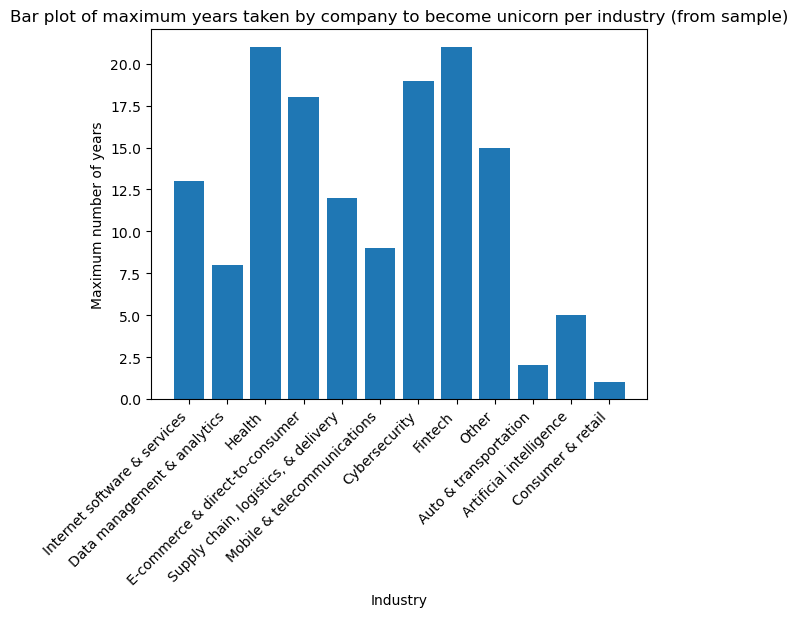

In [23]:
# Create bar plot with Industry column as the categories of the bars
# and the difference in years between Year Joined column and 
# Year Founded column as the heights of the bars

import matplotlib.pyplot as plt
plt.bar(sample_data["Industry"], sample_data["Year Joined"] - sample_data["Year Founded"])

# Set title
plt.title("Bar plot of maximum years taken by company to become unicorn per industry (from sample)")

# Set x-axis label
plt.xlabel("Industry")

# Set y-axis label
plt.ylabel("Maximum number of years")

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text  
plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot
plt.show()

### Use main data to visualize the plot to check as if differences

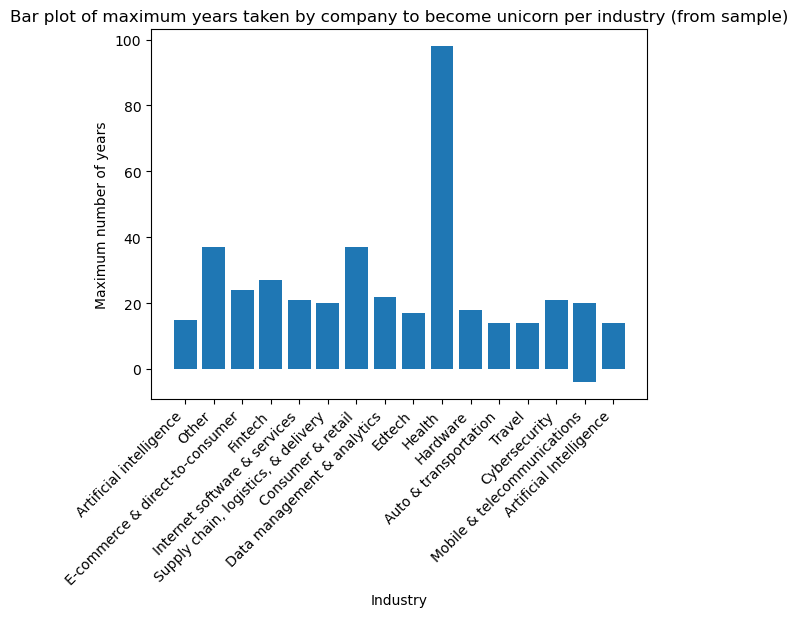

In [24]:
# Create bar plot with Industry column as the categories of the bars
# and the difference in years between Year Joined column and 
# Year Founded column as the heights of the bars

import matplotlib.pyplot as plt
plt.bar(df["Industry"], df["Year Joined"] - df["Year Founded"])

# Set title
plt.title("Bar plot of maximum years taken by company to become unicorn per industry (from sample)")

# Set x-axis label
plt.xlabel("Industry")

# Set y-axis label
plt.ylabel("Maximum number of years")

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text  
plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot
plt.show()

The sample data plot and the main (full) data shown very different plots in shapes. The bar plot of sample data shows that the largest value for maximum time taken to become a unicorn occurred in the Heath and Fintech industries, while in the plot of main data, the highest bar is only the Health industry, and the second one are consumer & retail and other industries.

### Visualize the maximum unicorn company valuation per industry

We need to convert the type of column 'Valuation' from object (string) into numerical type, unless the bar plot will be show a wrong graph.

In [34]:
# We need to remove the '$' and 'B' in the feature then convert the 'string' into numerical type
df["Valuation"] = df["Valuation"].replace('[\$,B]', '', regex=True)
df["Valuation"] = df["Valuation"].astype('float')

In [35]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   float64       
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
 10  Year Joined       1074 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 92.4+ KB


In [53]:
df.groupby('Industry').count()


,Company,Valuation,Date Joined,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
Industry,,,,,,,,,,
Artificial Intelligence,11,11,11,11,11,11,11,11,11,11
Artificial intelligence,73,73,73,71,73,73,73,73,73,73
Auto & transportation,31,31,31,31,31,31,31,31,31,31
Consumer & retail,25,25,25,25,25,25,25,25,25,25
Cybersecurity,50,50,50,50,50,50,50,50,50,50
Data management & analytics,41,41,41,41,41,41,41,41,41,41
E-commerce & direct-to-consumer,111,111,111,107,111,111,111,111,111,111
Edtech,28,28,28,28,28,28,28,28,28,28
Fintech,224,224,224,218,224,224,224,224,224,224


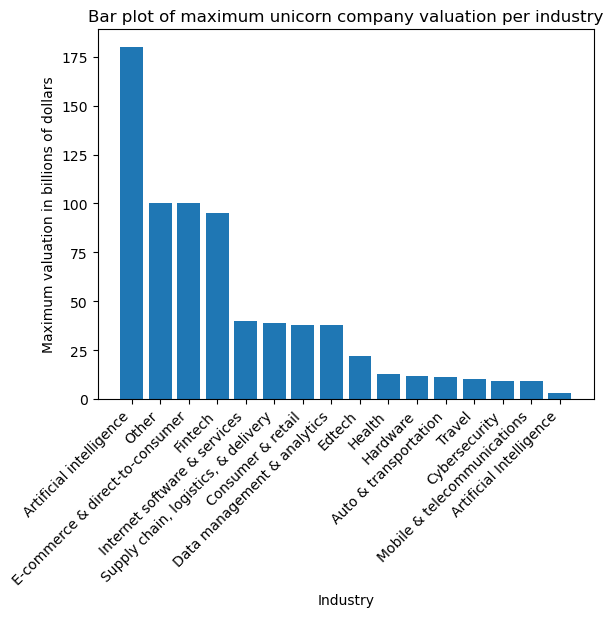

In [50]:
plt.bar(df["Industry"], df['Valuation'])

plt.title("Bar plot of maximum unicorn company valuation per industry")
plt.xlabel("Industry")
plt.ylabel("Maximum valuation in billions of dollars")
plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

As we can see, this bar plot shows us the highest maximum valuation occurred in the Artificial Intelligence industry, while the lowest maximum valuation occurred in the Cybersecurity and Mobile & telecommunications industryies.

You also saw that the rightmost column has name 'Artificial Intelligence', a small mistake in spelling (It should be 'intelligence' with lowercase of the 'i' letter), we will solve this problem below by changing the values/content of the column 'Industry'.

In [60]:
df['Industry'] = df['Industry'].replace(['Artificial Intelligence'], 'Artificial intelligence')

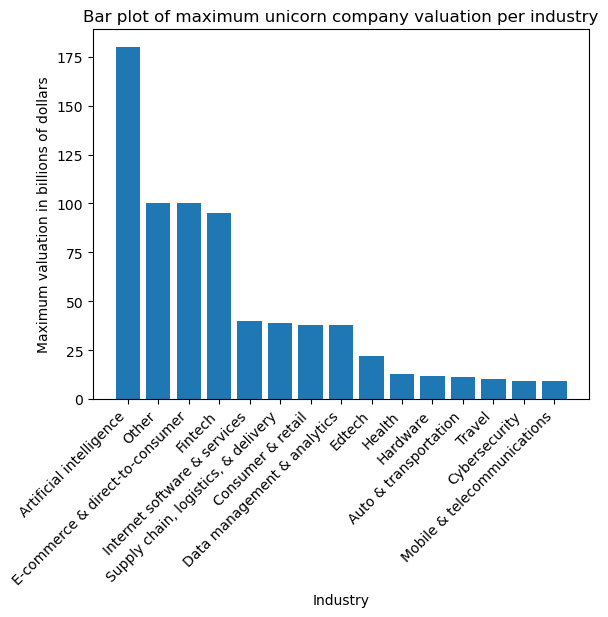

In [62]:
plt.bar(df["Industry"], df['Valuation'])

plt.title("Bar plot of maximum unicorn company valuation per industry")
plt.xlabel("Industry")
plt.ylabel("Maximum valuation in billions of dollars")
plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

### Conclusion

**What recommendations would we share with stakeholders based on these findings?**

It may be helpful to focus more on industry specifics. Next steps to consider:
- Identify the main industries that the investing firm is interested in investing in. 
- Select a subset of this data that includes only companies in those industries. 
- Analyze that subset more closely. Determine which companies have higher valuation but do not have as many investors currently. They may be good candidates to consider investing in. 